DataSets and DataLoader Classses
* [Probelm in Previous Data](https://www.geeksforgeeks.org/machine-learning/difference-between-batch-gradient-descent-and-stochastic-gradient-descent/)
* [Better Approach](https://www.geeksforgeeks.org/deep-learning/mini-batch-gradient-descent-in-deep-learning/)

In [76]:
import torch
import numpy as np
import pandas as pd

In [77]:
w=torch.tensor(3.0,requires_grad=True)
b=torch.tensor(1.0,requires_grad=True)

In [78]:
x=torch.tensor([1,2,3,4])
y=torch.tensor([2,4,6,8])

In [79]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)


In [80]:
loss_history = []
batch_size=32
n_sample=len(x_train)
for epoch in range(10):
    for i in range(0,len(x_train),batch_size):
      for start_idx in range(0, len(x_train), batch_size):
        end_idx = start_idx + batch_size
        x_batch=x_train[i:i+batch_size]
        y_batch=y_train[i:i+batch_size]
        y_pred=w*x_batch+b
        loss=torch.mean((y_pred-y_batch)**2)
        loss.backward()
        with torch.no_grad():
            w-=0.01*w.grad
            b-=0.01*b.grad
        w.grad.zero_()
        b.grad.zero_()
        optimizer=torch.optim.SGD([w,b],lr=0.01)
    y_pred=w*x_test+b
    loss=torch.mean((y_pred-y_test)**2)
    loss_history.append(loss.item())
    print(f"Epoch:{epoch+1},Loss:{loss.item()}")

Epoch:1,Loss:19.418703079223633
Epoch:2,Loss:15.048540115356445
Epoch:3,Loss:11.630973815917969
Epoch:4,Loss:8.962223052978516
Epoch:5,Loss:6.8816609382629395
Epoch:6,Loss:5.262745380401611
Epoch:7,Loss:4.005830764770508
Epoch:8,Loss:3.0324630737304688
Epoch:9,Loss:2.280933141708374
Epoch:10,Loss:1.702724575996399


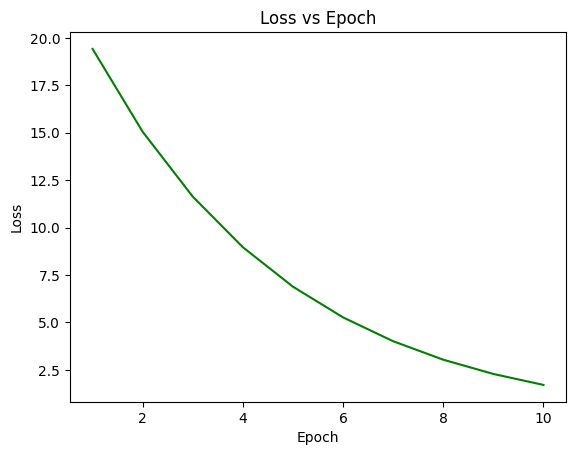

In [81]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(loss_history) + 1), loss_history,c="g")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epoch')
plt.show()

# **A Better Approach !**

In [82]:
from sklearn.datasets import make_classification


In [83]:
a,b=make_classification(
    n_samples=15,
    n_features=2,
    n_classes=2,
    n_informative=2,
    n_redundant=0,
    random_state=42
)

In [84]:
a.shape,b.shape

((15, 2), (15,))

In [85]:
a=torch.tensor(a,dtype=torch.float32)
b=torch.tensor(b,dtype=torch.float32)

In [86]:
from torch.utils.data import Dataset,DataLoader

In [87]:
class my_dataset(Dataset):
  def __init__(self,a,b):
    self.a=a
    self.b=b
  def __len__(self):
    return len(self.a)
  def __getitem__(self,idx):
    #Apply Transformations here

    return self.a[idx],self.b[idx]


In [88]:
dataset=my_dataset(a,b)


In [89]:
dataloader=DataLoader(dataset,batch_size=2,shuffle=True)
# shuffles via sampler
#sequnetial or random sampler

In [90]:
for batch_a,batch_b in dataloader:
  print(batch_a,batch_b)
  print("----------------")

tensor([[-0.7989,  0.4270],
        [ 0.6633,  0.2493]]) tensor([0., 1.])
----------------
tensor([[-1.2387,  1.4108],
        [ 0.7880,  0.5862]]) tensor([0., 1.])
----------------
tensor([[-1.1964, -0.9982],
        [ 0.4392,  0.1795]]) tensor([0., 1.])
----------------
tensor([[-1.0922, -1.9126],
        [ 0.7920, -0.8246]]) tensor([0., 1.])
----------------
tensor([[-0.5949,  0.8776],
        [-0.0993,  0.8415]]) tensor([1., 0.])
----------------
tensor([[-1.0581, -0.7125],
        [ 0.4692, -0.3438]]) tensor([0., 1.])
----------------
tensor([[-0.1463,  1.2100],
        [ 0.5762, -0.3023]]) tensor([0., 1.])
----------------
tensor([[-0.9697, -0.9093]]) tensor([0.])
----------------


**Created Batches now we  can Furthur do Parellelisation also ......**

In [91]:
# collate fxn in dataloader class
# how to combine the samples

def my_collate_fn(batch):
  # Example: Transpose the batch
  a = torch.stack([item[0] for item in batch])
  b = torch.stack([item[1] for item in batch])
  return [a, b]